In [1]:
import time
import datetime
import pytz
import glob

import numpy as np
import pandas as pd

import networkx as nx

import email

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang import listserv
from bigbang.listserv import ListservArchive, ListservList, ListservMessageParser
from bigbang.analysis.listserv import ListservArchive as MArchive
from bigbang.analysis.listserv import ListservList as MList

plt.style.use("publication_jcap.mplstyle")

In [2]:
filedsc = "3GPP_TSG_SA_WG4*"
march = ListservArchive.from_mbox(
    name="3GPP",
    directorypath=f"/home/christovis/AGE/datactive/bigbang-archives/3GPP/",
    filedsc=filedsc,
)
df = march.to_pandas_dataframe(include_body=False)
df = df[["from", "mailing-list"]].dropna()

In [14]:
if not pd.isna(1):
    print("yes")

yes


# Mailing lists

In [3]:
dic_mems = {}
dic_affs = {}
for mlist_name in list(set(df["mailing-list"].values)):
    mems = df[df["mailing-list"] == mlist_name]["from"].values
    """
    if mlist_name == "3GPP_TSG_GERAN":
        for mem in mems:
            try:
                hmm = email.utils.parseaddr(mem)[1]
            except:
                print(mem)
    """
    addrs = [email.utils.parseaddr(mem)[1] for mem in mems]
    domains = [addr.split("@")[-1] for addr in addrs if "@" in addr]
    dic_mems[mlist_name] = list(set(addrs))
    dic_affs[mlist_name] = list(set(domains))

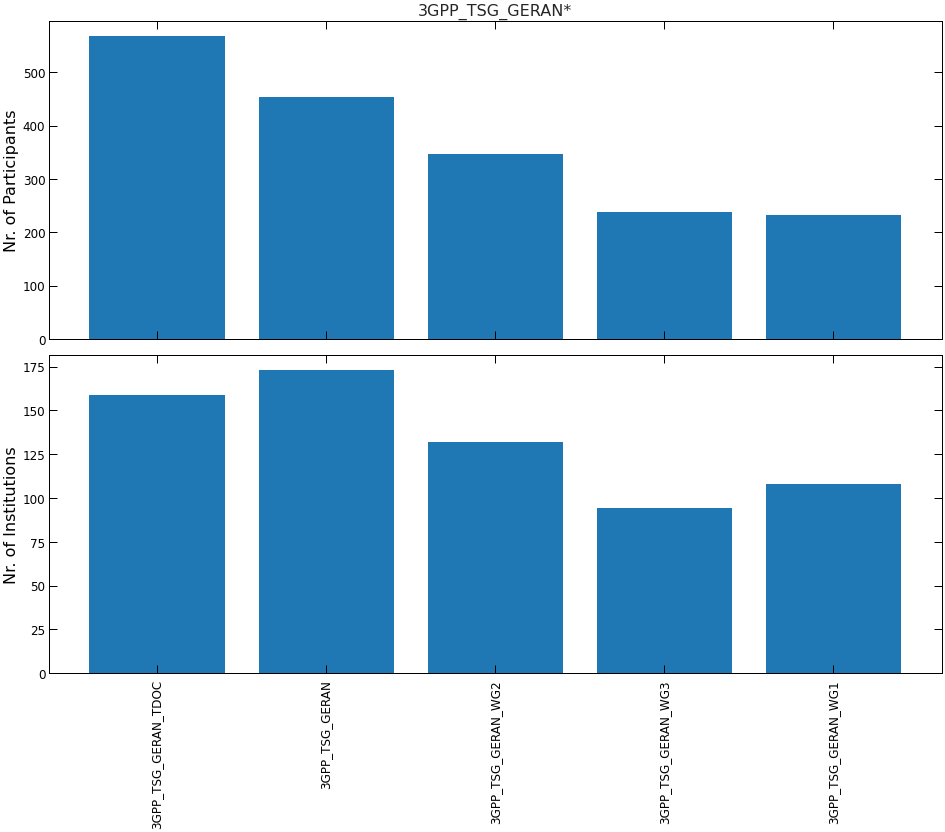

In [4]:
fig, ax = plt.subplots(
    2,
    1,
    figsize=(16, 6 * 2),
    sharex="col",
    sharey="row",
    facecolor="w",
    edgecolor="w",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

# get # of participants in each mailing list
mem_labels = list(dic_mems.keys())
mem_counts = np.array([len(dic_mems[key]) for key in dic_mems.keys()])

# sort in decreasing order
idx = np.argsort(mem_counts)
mem_labels = [mem_labels[ii] for ii in idx[::-1]]
mem_counts = mem_counts[idx[::-1]]

# get # of participants in each mailing list
aff_labels = list(dic_affs.keys())
aff_counts = np.array([len(dic_affs[key]) for key in dic_affs.keys()])

# sort according to mem_counts
aff_labels = [aff_labels[ii] for ii in idx[::-1]]
aff_counts = aff_counts[idx[::-1]]


ax[0].bar(
    np.arange(len(mem_counts)),
    mem_counts,
)

ax[1].bar(
    np.arange(len(aff_counts)),
    aff_counts,
)

ax[0].minorticks_off()
ax[1].minorticks_off()

ax[1].set_xticks(np.arange(len(mem_labels)))
ax[1].set_xticklabels(mem_labels, rotation=90)

ax[0].set_ylabel("Nr. of Participants")
ax[1].set_ylabel("Nr. of Institutions")

ax[0].set_title(filedsc)

"""
plt.savefig(
    f"{filedsc}_nraffs_nrmems.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""
plt.show()

# Institutions

In [6]:
dic_mems = {}
dic_mlis = {}
for mem in list(set(df["from"].values)):
    mlist_names = list(set(df[df["from"] == mem]["mailing-list"].values))
    name, addr = email.utils.parseaddr(mem)
    try:
        localpart, domain = addr.split("@")
    except:
        continue

    if localpart in list(dic_mems.keys()):
        dic_mems[domain] += localpart
    else:
        dic_mems[domain] = []
        dic_mems[domain] += localpart

    if domain in list(dic_mlis.keys()):
        dic_mlis[domain] += mlist_names
    else:
        dic_mlis[domain] = []
        dic_mlis[domain] += mlist_names

dic_mems = {key: len(list(set(value))) for key, value in dic_mems.items()}
dic_mlis = {key: len(list(set(value))) for key, value in dic_mlis.items()}

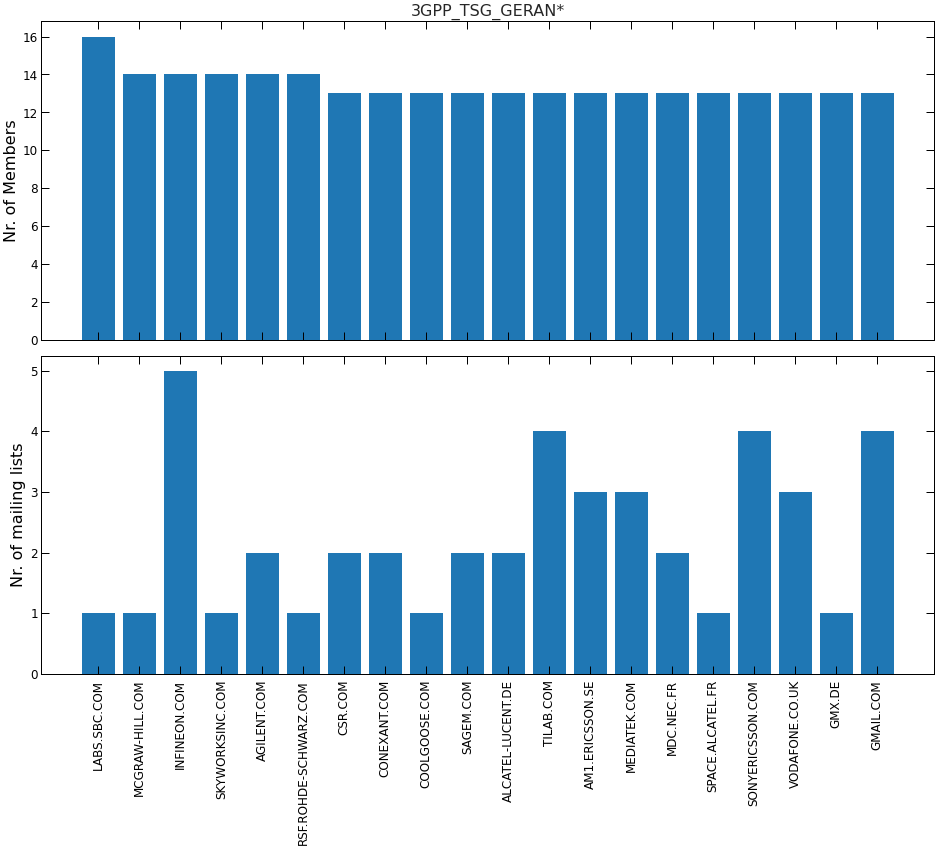

In [10]:
fig, ax = plt.subplots(
    2,
    1,
    figsize=(16, 6 * 2),
    sharex="col",
    sharey="row",
    facecolor="w",
    edgecolor="w",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

# get # of participants in each mailing list
mem_labels = list(dic_mems.keys())
mem_counts = np.array(list(dic_mems.values()))

# sort in decreasing order
idx = np.argsort(mem_counts)
mem_labels = [mem_labels[ii] for ii in idx[::-1]]
mem_counts = mem_counts[idx[::-1]]

# get # of participants in each mailing list
mlis_labels = list(dic_mlis.keys())
mlis_counts = np.array(list(dic_mlis.values()))

# sort according to mem_counts
mlis_labels = [mlis_labels[ii] for ii in idx[::-1]]
mlis_counts = mlis_counts[idx[::-1]]

nr_vis = 20
ax[0].bar(
    np.arange(len(mem_counts))[:nr_vis],
    mem_counts[:nr_vis],
)

ax[1].bar(
    np.arange(len(mlis_counts))[:nr_vis],
    mlis_counts[:nr_vis],
)

ax[0].minorticks_off()
ax[1].minorticks_off()

ax[1].set_xticks(np.arange(len(mem_labels[:nr_vis])))
ax[1].set_xticklabels(mem_labels[:nr_vis], rotation=90)

ax[0].set_ylabel("Nr. of Members")
ax[1].set_ylabel("Nr. of mailing lists")

ax[0].set_title(filedsc)

"""
plt.savefig(
    f"{filedsc}_nraffs_nrmems.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""
plt.show()

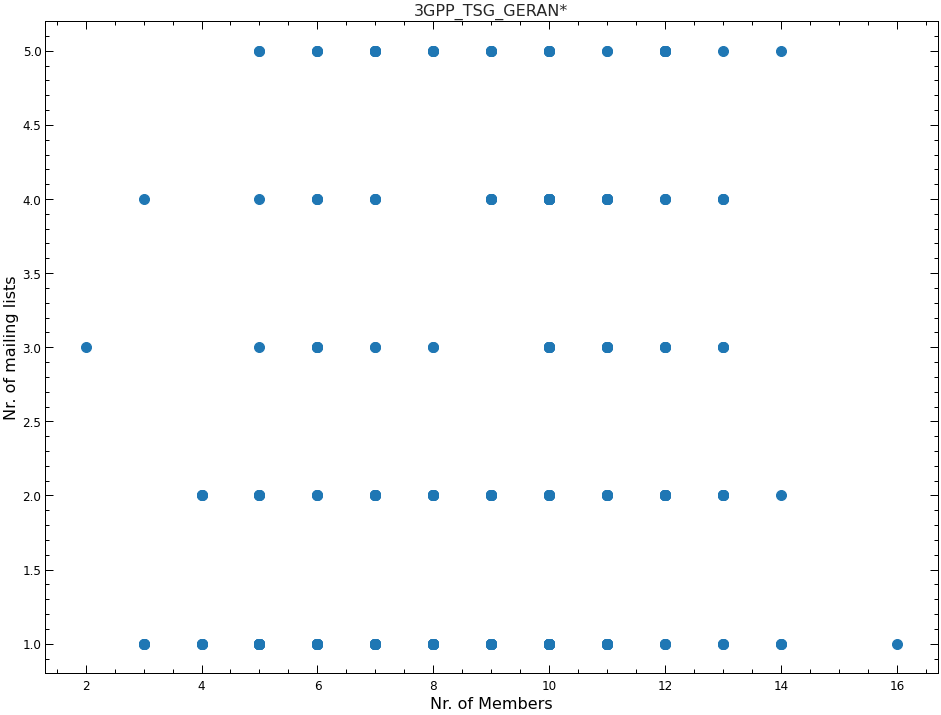

In [8]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(16, 6 * 2),
    sharex="col",
    sharey="row",
    facecolor="w",
    edgecolor="w",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

# get # of participants in each mailing list
mem_labels = list(dic_mems.keys())
mem_counts = np.array(list(dic_mems.values()))

# sort in decreasing order
idx = np.argsort(mem_counts)
mem_labels = [mem_labels[ii] for ii in idx[::-1]]
mem_counts = mem_counts[idx[::-1]]

# get # of participants in each mailing list
mlis_labels = list(dic_mlis.keys())
mlis_counts = np.array(list(dic_mlis.values()))

# sort according to mem_counts
mlis_labels = [mlis_labels[ii] for ii in idx[::-1]]
mlis_counts = mlis_counts[idx[::-1]]

ax.scatter(
    mem_counts,
    mlis_counts,
)

ax.set_xlabel("Nr. of Members")
ax.set_ylabel("Nr. of mailing lists")

ax.set_title(filedsc)

"""
plt.savefig(
    f"{filedsc}_nraffs_nrmems.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""
plt.show()